# Анализ бизнес-показателей Яндекс.Афиши

Нам предстоит проанализировать данные для отдела маркетинговой аналитики Яндекс.Афиши. В нашем распоряжении данные с июня 2017 по конец мая 2018 года: данные о посещениях, заказах и статистика рекламных расходов. Первое задание: <b>помочь маркетологам снизить расходы</b> — отказаться от невыгодных источников трафика и перераспределить бюджет. Также необходимо понять:<br>
• <b>как</b> клиенты пользуются сервисом<br>
• <b>когда</b> делают первые покупки на сайте<br>
• <b>сколько денег</b> приносит компании каждый клиент<br>
• когда <b>расходы</b> на привлечение клиента окупаются<br>

Данное исследование разделим на несколько шагов.<br>
## <a href='#section1'>1. Загрузка и подготовка данных</a><br>
### <a href='#section11'>1.1 Импорт файлов и библиотек</a><br>
### <a href='#section12'>1.2 Подготовка данных</a><br>
## <a href='#section2'>2. Подсчет метрик</a><br>
### <a href='#section21'>2.1. Продуктовые метрики</a><br>
#### <a href='#section211'>2.1.1 DAU, WAU, MAU</a><br>
#### <a href='#section212'>2.1.2 Ежедневные посещения</a><br>
#### <a href='#section213'>2.1.3 Продолжительность сессий</a><br>
#### <a href='#section214'>2.1.4 Retention Rate(когортный анализ)</a><br>
### <a href='#section22'>2.2. Метрики электронной коммерции</a><br>
#### <a href='#section221'>2.2.1 Время до первой покупки</a><br>
#### <a href='#section222'>2.2.2 Покупки на одного клиента</a><br>
#### <a href='#section223'>2.2.3 Средняя выручка с пользователя</a><br>
#### <a href='#section224'>2.2.4 LTV по когортам</a><br>
### <a href='#section23'>2.3. Маркетинговые метрики</a><br>
#### <a href='#section231'>2.3.1 Расходы на маркетинг по источникам</a><br>
#### <a href='#section232'>2.3.2 Стоимость привлечения пользователя (CAC)</a><br>
#### <a href='#section233'>2.3.3 ROMI по когортам в разных источниках</a><br>
## <a href='#section3'>3. Выводы и рекомендации</a><br>
### <a href='#section31'>3.1. Определение приоритетных источников трафика и типов устройств</a><br>
### <a href='#section32'>3.2. Выводы о метриках: маркетинговых, продуктовых, метриках электронной коммерции</a><br>
### <a href='#section33'>3.3. Итоги когортного анализа</a><br>
### <a href='#section34'>3.4. Метрики в разрезе устройств</a><br>

## <a id='section1'>1. Загрузка и подготовка данных</a>

### <a id='section11'>1.1 Импорт файлов и библиотек</a>

In [1]:
#Импортируем библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
#Выберем стиль графиков matplotlib
plt.style.use('seaborn-whitegrid')
#Импортируем файлы
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')
#Назначаем имена датафреймов
visits.name = 'visits'
orders.name = 'orders'
costs.name = 'costs'
#Приводим названия колонок к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Датасеты и необходимые библиотеки импортированы. Датафреймы переименованы, названия колонок приведены к нижнему регистру.

### <a id='section12'>1.2 Подготовка данных</a>

In [2]:
#Проверяем данные на аномалии и ошибки
def check_data(df):
    print('Проверяем датафрейм:', df.name)
    display(df.head(5))
    display(df.describe())
    display(df.info())
    display(df.duplicated().unique())
check_data(visits)
check_data(orders)
check_data(costs)

Проверяем датафрейм: visits


,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,source id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null object
source id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

array([False])

Проверяем датафрейм: orders


,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

array([False])

Проверяем датафрейм: costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

array([False])

Данные в таблицах нормально распределены, в них нет пропусков, ошибок и дубликатов. Стобцы source приведем к одному названию. Типы данных необходимо оптимизировать для уменьшения размера файлов: 'source_id' в таблицах costs и visits можно заменить на uint8. Столбцы с данными времени поменять с object на datetime. Столбец 'revenue' в orders и 'costs' в costs поменять на float32. Заменяем пробелы в названиях столбцов на '_'.

In [3]:
visits.rename(columns={'source id': 'source_id', 'end ts': 'end_ts', 'start ts': 'start_ts'}, inplace=True)
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
visits['source_id'] = visits['source_id'].astype('uint8')
costs['source_id'] = costs['source_id'].astype('uint8')
orders['revenue'] = orders['revenue'].astype('float32')
costs['costs'] = costs['costs'].astype('float32')
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

Изменения типов данных сохранены.

## <a id='section2'>2. Подсчет метрик</a>

### <a id='section21'>2.1. Продуктовые метрики</a>

#### <a id='section211'>2.1.1 DAU, WAU, MAU</a>

In [4]:
#Определяем день, неделю и месяц активности пользователей
user_activity = visits
user_activity['session_date'] = user_activity['start_ts'].dt.date
user_activity['session_week'] = user_activity['start_ts'].dt.week
user_activity['session_month'] = user_activity['start_ts'].dt.month
user_activity['session_year'] = user_activity['start_ts'].dt.year
#Определяем количество уникальных пользователей в день, месяц и год
dau_total = user_activity.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
wau_total = user_activity.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
mau_total = user_activity.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
#Посмотрим на средние значения метрик
print('Среднее DAU:', int(dau_total['uid'].mean()), 'пользователей')
print('Среднее WAU:', int(wau_total['uid'].mean()), 'пользователей')
print('Среднее MAU:', int(mau_total['uid'].mean()), 'пользователей')

Среднее DAU: 907 пользователей
Среднее WAU: 5716 пользователей
Среднее MAU: 23228 пользователей


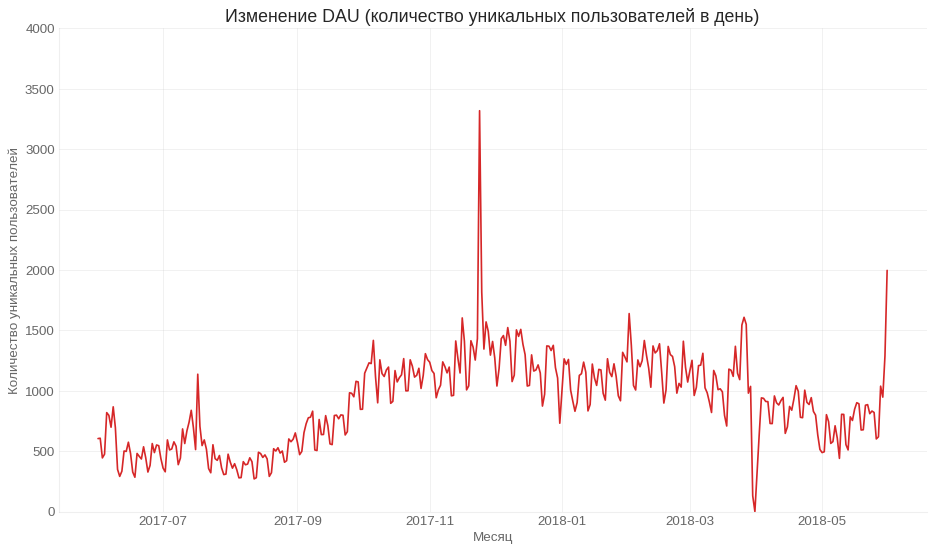

In [5]:
#Построим графики изменения метрики DAU во времени
plt.figure(figsize=(14,8), dpi= 80)
plt.plot('session_date', 'uid', data=dau_total, color='tab:red')
#Настраиваем оформление
plt.ylim(0, 4000)
plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц', alpha=.7, fontsize=12)
plt.ylabel('Количество уникальных пользователей', alpha=.7, fontsize=12)
plt.title("Изменение DAU (количество уникальных пользователей в день)", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [6]:
#Определим на какие даты приходятся пики активности
dau_total[dau_total['uid'] > 1800].head()

,session_date,uid
176,2017-11-24,3319
177,2017-11-25,1817
363,2018-05-31,1997


In [7]:
#Определим на какие даты приходятся аномальные падения активности
dau_total[dau_total['uid'] < 200].head()

,session_date,uid
302,2018-03-30,131
303,2018-03-31,1


На выходных(сб-вс) наблюдается некоторое падение активности. За указанный период есть два аномальных пика - в конце ноября 2017 года (пт-сб) и конце мая 2018 года(чт). Это может быть связано с рекламной активностью. В конце марта 2018 года было аномальное падение. Это может быть связано с техническими проблемами сервиса.

In [8]:
user_activity['month'] = user_activity['session_date'].astype('datetime64[M]')
mau_total_by_device = user_activity.groupby(['month', 'device']).agg({'uid': 'nunique'}).reset_index()
mau_total_by_device.head()

,month,device,uid
0,2017-06-01,desktop,9761
1,2017-06-01,touch,3655
2,2017-07-01,desktop,10145
3,2017-07-01,touch,4223
4,2017-08-01,desktop,8611


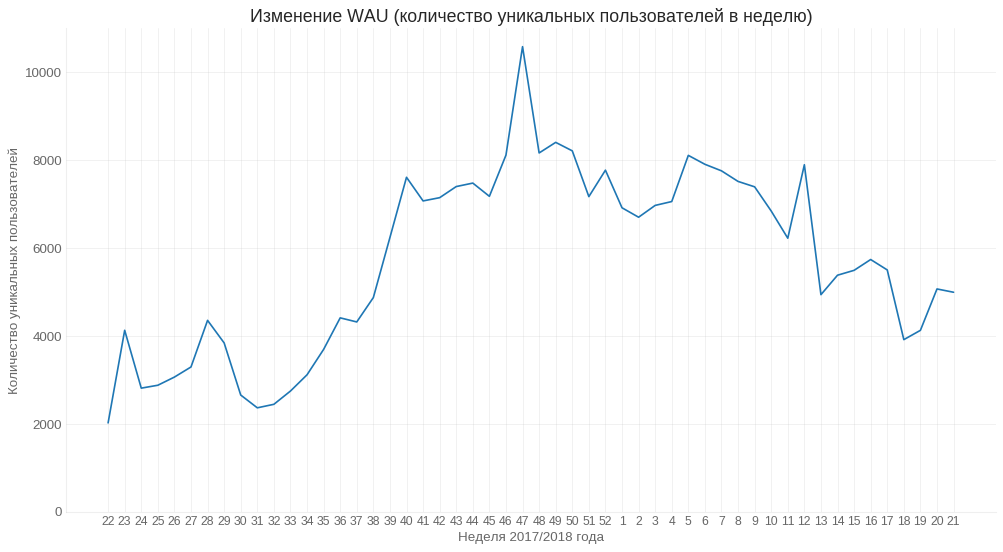

In [9]:
#Построим графики изменения метрики WAU во времени
plt.figure(figsize=(15,8), dpi= 80)
plt.plot([str(x) for x in wau_total['session_week'][:52]], wau_total['uid'][:52], color='tab:blue')
#Настраиваем оформление
plt.ylim(0, 11000)
plt.xticks(rotation=0, fontsize=11, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Неделя 2017/2018 года', alpha=.7, fontsize=12)
plt.ylabel('Количество уникальных пользователей', alpha=.7, fontsize=12)
plt.title("Изменение WAU (количество уникальных пользователей в неделю)", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Начиная с 37 недели 2017 года количество уникальных пользователей в неделю начало быстро расти. Сыграли свою роль вложения в рекламу. По итогам 21 недели 2018 года количество активных пользователей в неделю было в 2.5 раза, чем год назад. На протяжении всего времени встречаются небольшие пики активности и последующие падения. Это может быть связано с рекламными экспериментами или новизной контента, который предоставляет сервис и его востребованностью аудиторией.

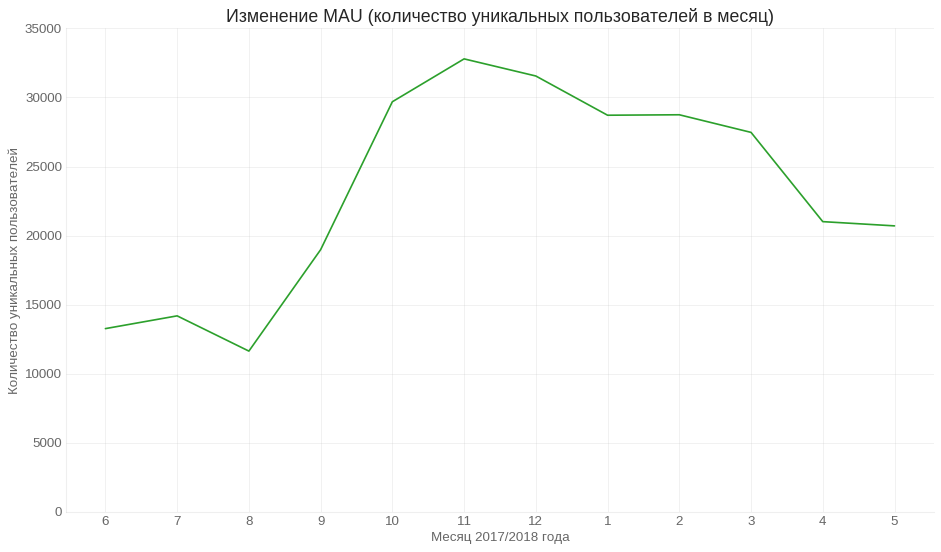

In [10]:
#Построим графики изменения метрики MAU во времени
plt.figure(figsize=(14,8), dpi= 80)
plt.plot([str(x) for x in mau_total['session_month']], 'uid', data=mau_total, color='tab:green')
#Настраиваем оформление
plt.ylim(0, 35000)
plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц 2017/2018 года', alpha=.7, fontsize=12)
plt.ylabel('Количество уникальных пользователей', alpha=.7, fontsize=12)
plt.title("Изменение MAU (количество уникальных пользователей в месяц)", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Самое низкое значение уникальных пользователей - в августе 2017 года. Вероятно, на это время приходится максимальное количество отпусков и люди не пользуются сервисом Яндекс.Афиша. Рекламные расходы в это время тоже небольшие, из-за сезона и незаинтересованности аудитории.

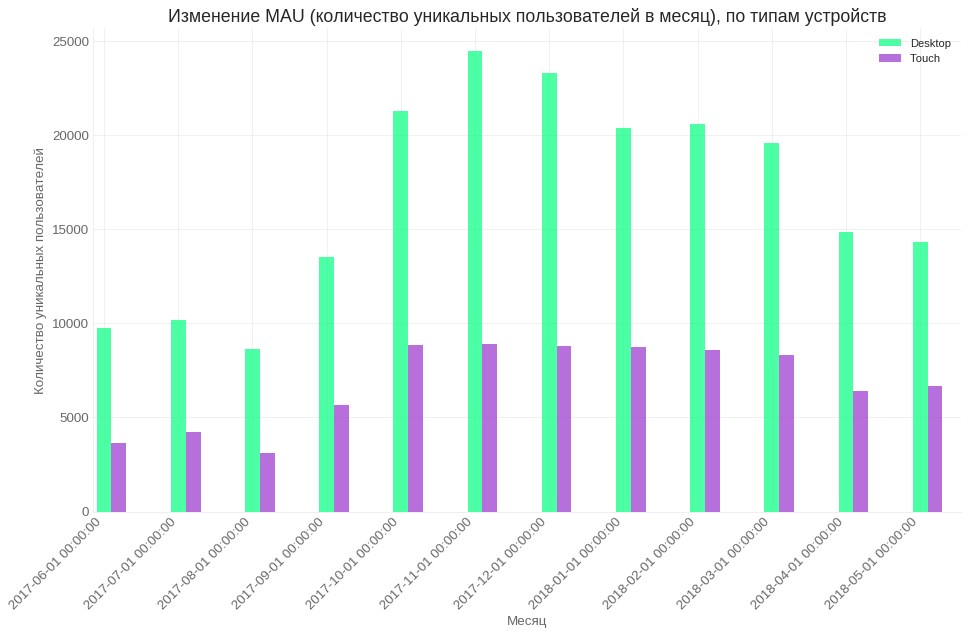

In [11]:
#Построим графики изменения метрики MAU по устройствам во времени
fig = plt.figure(figsize=(14,8), dpi= 80)
ax = fig.add_subplot()
mau_total_by_device[mau_total_by_device['device'] == 'desktop'].plot.bar('month', 'uid', width=0.2, position=0.5, color="springgreen", ax=ax, alpha=0.7)
mau_total_by_device[mau_total_by_device['device'] == 'touch'].plot.bar('month', 'uid', width=0.2, position=-0.5, color="darkorchid", ax=ax, alpha=0.7)
plt.xticks(rotation=45, fontsize=12, alpha=.7, horizontalalignment='right')
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц', alpha=.7, fontsize=12)
plt.ylabel('Количество уникальных пользователей', alpha=.7, fontsize=12)
plt.title("Изменение MAU (количество уникальных пользователей в месяц), по типам устройств", fontsize=16)
plt.legend(('Desktop', 'Touch'))
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

В основном пользователи заходят с устройств типа Desktop. Во время увеличения рекламных расходов с сентября, больше эскпериментов проводилось с пользователями на устройствах touch. После мая 2018 года пользователей устройств touch стало больше, чем год назад (относительно пользователей устройств Desktop). 

#### <a id='section212'>2.1.2 Ежедневные посещения</a>

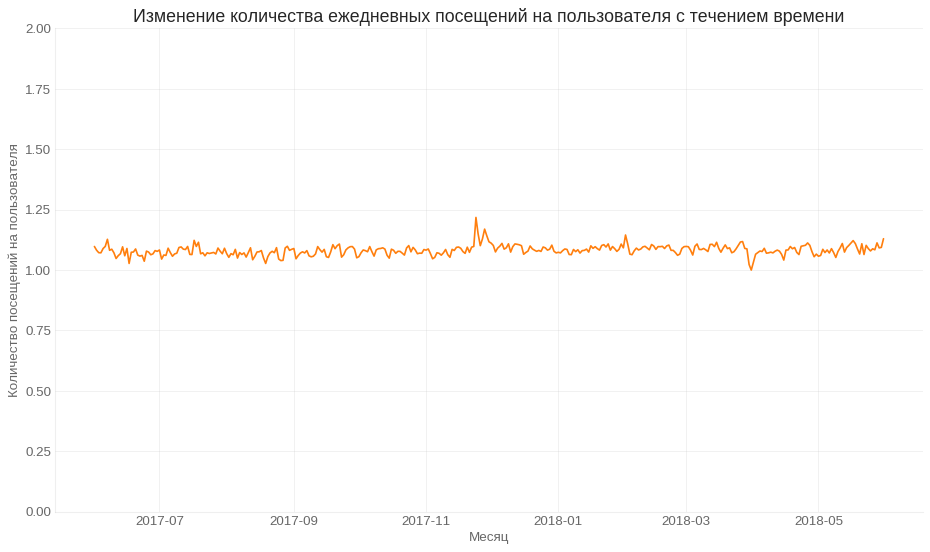

In [12]:
#Посчитаем количество посещений на пользователя каждый день
visits_per_user_daily = user_activity.groupby('session_date').agg({'uid': ['count', 'nunique']})
visits_per_user_daily.columns = ['n_visits', 'n_users']
visits_per_user_daily['visits_per_user'] = visits_per_user_daily['n_visits'] / visits_per_user_daily['n_users']
visits_per_user_daily.reset_index(inplace=True)
#Построим графики изменения метрики во времени
plt.figure(figsize=(14,8), dpi= 80)
plt.plot('session_date', 'visits_per_user', data=visits_per_user_daily, color='tab:orange')
#Настраиваем оформление
plt.ylim(0, 2)
plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц', alpha=.7, fontsize=12)
plt.ylabel('Количество посещений на пользователя', alpha=.7, fontsize=12)
plt.title("Изменение количества ежедневных посещений на пользователя с течением времени", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()


Метрика довольна стабильна и вне зависимости от рекламных расходов, сезона, большинство пользователей заходят на сайт не больше одного раза в день. Это может быть связано с моделью покупательского поведения. Люди смотрят анонсы мероприятий, и больше не возвращаются на сайт. Кто-то совершает заказы в рамках одной сессии и очень немногие откладывают это на последующие сессии.

#### <a id='section213'>2.1.3 Продолжительность сессий</a>

In [13]:
#Добавим столбец со средней продолжительностью сессии и выведем среднее значение
user_activity['session_duration_sec'] = (user_activity['end_ts'] - user_activity['start_ts']).dt.seconds
display(user_activity['session_duration_sec'].mean())

643.506488592098

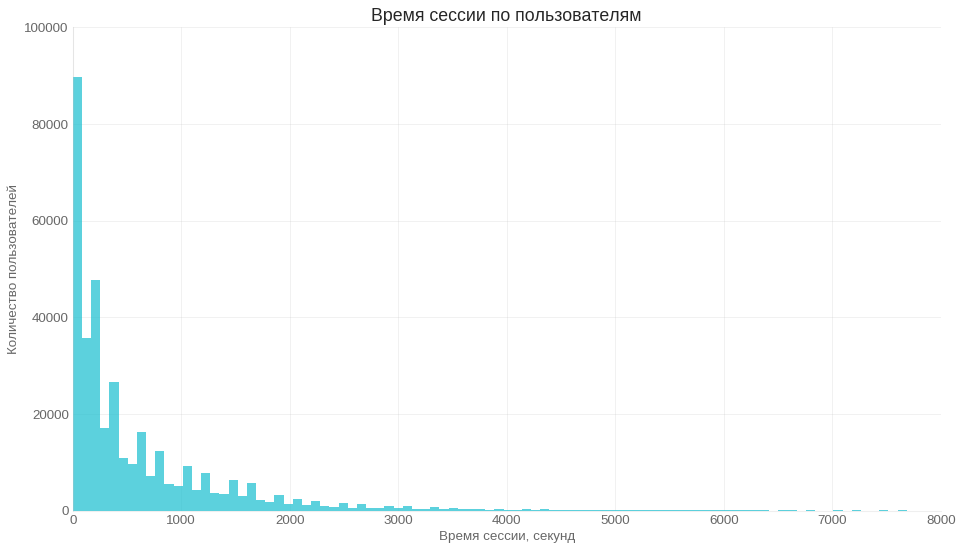

In [14]:
#Посмотрим на распределение через гистограмму и подсчет самых часто встречающихся значений
plt.figure(figsize=(14,8), dpi= 80)
plt.hist(user_activity['session_duration_sec'], bins=1000, facecolor='tab:cyan', alpha=0.7)
plt.ylim(0, 100000)
plt.xlim(0, 8000)
plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Время сессии, секунд', alpha=.7, fontsize=12)
plt.ylabel('Количество пользователей', alpha=.7, fontsize=12)
plt.title("Время сессии по пользователям", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [15]:
#Посмотрим на наиболее распространенные значения продолжительности сессии
display(user_activity['session_duration_sec'].mode())

0    60
dtype: int64

Наиболее часто сессии непродолжительны. Возможно, это связано с тем что люди которые совершили переходы по рекламе видят на сайте не ту информацию, которая соответствовала их ожиданиям. Некоторые отказываются от сессии сразу, многие другие не задерживаются более чем на минуту. Распределение сильно скошено и использование здесь моды выглядит оптимальным.

#### <a id='section214'>2.1.4 Retention Rate(когортный анализ)</a>

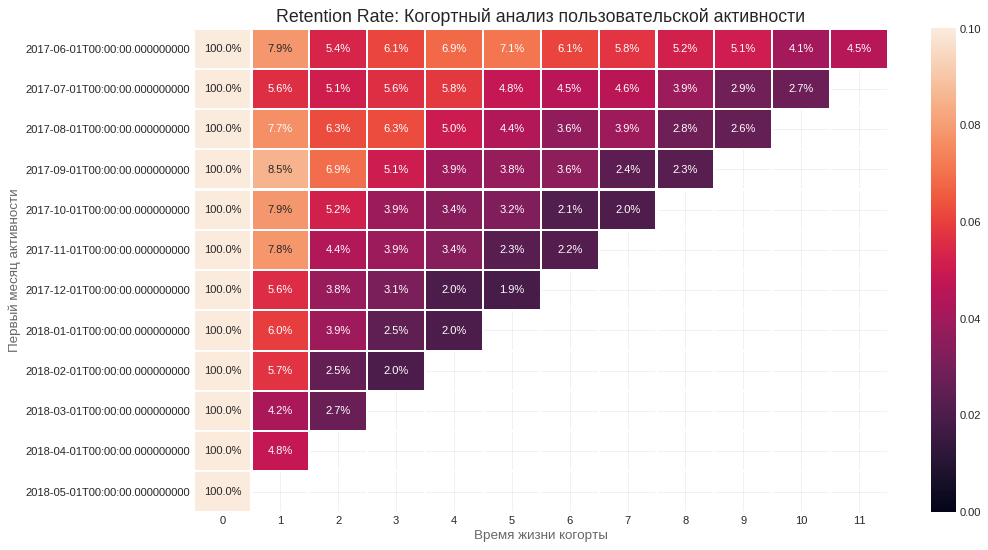

In [16]:
#Создаем датафрейм с данными для когорт
cohorts_activity = visits[['uid', 'start_ts']]
cohorts_activity['activity_date'] = cohorts_activity['start_ts'].dt.date
cohorts_activity['activity_date'] = pd.to_datetime(cohorts_activity['activity_date'])
#Определяем день первой сессии для каждого пользователя
first_activity_date = cohorts_activity.groupby(['uid'])['activity_date'].min()
first_activity_date.name = 'first_activity_date'
cohorts_activity = cohorts_activity.join(first_activity_date, on='uid')
#Переводим новый столбец в необходимый формат
cohorts_activity['first_activity_date'] = pd.to_datetime(cohorts_activity['first_activity_date'])
#Находим первую и последующие месяцы активности
cohorts_activity['activity_month'] = cohorts_activity['activity_date'].astype('datetime64[M]')
cohorts_activity['first_activity_month'] = cohorts_activity['first_activity_date'].astype('datetime64[M]')
#Находим к какой когорте относятся пользователь
cohorts_activity['cohort_lifetime'] = cohorts_activity['activity_month'] - cohorts_activity['first_activity_month']
cohorts_activity['cohort_lifetime'] = (cohorts_activity['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')
#посчитаем для каждой когорты количество активных пользователей
cohorts = cohorts_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#Находим исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
# Соедимн исходное количество пользователей с другими данными о когортах
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
#Рассчитаем Retention Rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
#Создаем сводную таблицу Retention
retention_pivot = cohorts.pivot_table(index='first_activity_month', columns='cohort_lifetime', values='retention', aggfunc='sum')
#Выводим тепловую карту
plt.figure(figsize=(14, 8), dpi= 80)
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, vmin=0, vmax=0.1)
plt.xlabel('Время жизни когорты', alpha=.7, fontsize=12)
plt.ylabel('Первый месяц активности', alpha=.7, fontsize=12)
plt.title("Retention Rate: Когортный анализ пользовательской активности", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()  

Наиболее высокий Retention у пользователей, которые пришли в летние месяцы(июнь, июль, август) и сентябре. Это может быть связано, что в этот период Яндекс.Афиша только вышла на рынок с обновленным сервисом/приложением. Либо это были более осознанные посетители, органические, первые группы, ядро ЦА, пользователи наиболее заинтересованы в услугах сервиса. На низкий Retention последующих когорт могла повлиять рекламная стратегия и расширение ядра ЦА до более широкой аудитории, не замотивированной в частом использовании сервиса.

### <a id='section22'>2.2. Метрики электронной коммерции</a>

#### <a id='section221'>2.2.1 Время до первой покупки</a>

In [17]:
#Сгруппируем визиты по пользователям и найдем время первого визита
first_visit_time = visits.groupby('uid')['start_ts'].min()
first_visit_time.name = 'first_visit_time'
visits_by_uid = visits.join(first_visit_time, on='uid')[['uid', 'first_visit_time']]
#Сгруппируем заказы по пользователям и найдем время первой покупки
first_order_time = orders.groupby('uid')['buy_ts'].min()
first_order_time.name = 'first_order_time'
orders_by_uid = orders.join(first_order_time, on='uid')[['uid', 'first_order_time']]
#Объединим две таблицы
visits_and_orders_by_uid = visits_by_uid.merge(orders_by_uid, on='uid')
#Удалим дубликаты
visits_and_orders_by_uid.drop_duplicates(inplace=True)
#Найдем разницу во времени между первым заказом и первой покупкой в минутах
visits_and_orders_by_uid['time_diff'] = visits_and_orders_by_uid['first_order_time'] - visits_and_orders_by_uid['first_visit_time']
visits_and_orders_by_uid['time_diff'] = (visits_and_orders_by_uid['time_diff'] / np.timedelta64(1, 'm'))
#Изучим подробнее полученный столбец
visits_and_orders_by_uid['time_diff'].describe()


count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: time_diff, dtype: float64

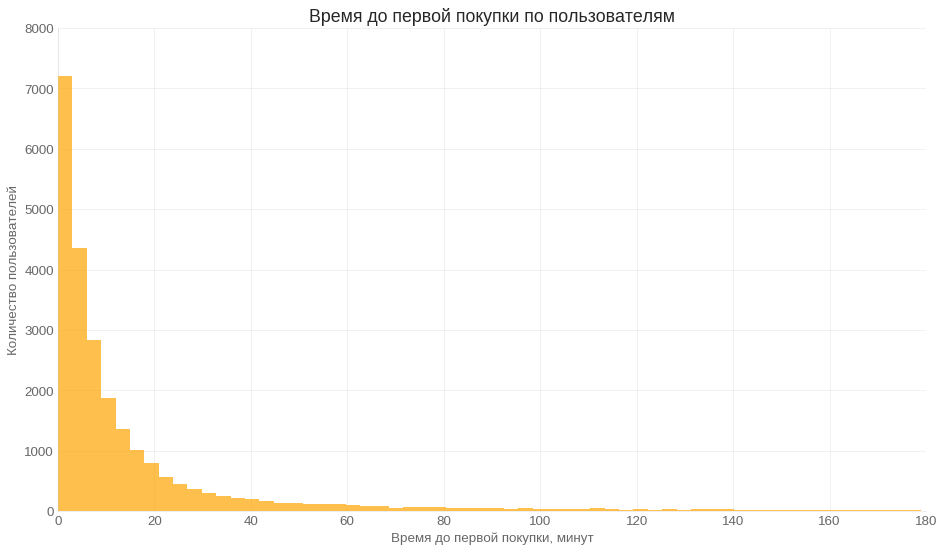

In [18]:
#Построим распределение, ограничив время до первой покупки тремя часами (180 минут)
plt.figure(figsize=(14,8), dpi= 80)
plt.hist(visits_and_orders_by_uid.query('time_diff < 180')['time_diff'], bins=60, facecolor='orange', alpha=0.7)
plt.ylim(0, 8000)
plt.xlim(0, 180)
plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Время до первой покупки, минут', alpha=.7, fontsize=12)
plt.ylabel('Количество пользователей', alpha=.7, fontsize=12)
plt.title("Время до первой покупки по пользователям", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Ярко выражена ассиметрия в распределении, найдем моду.

In [19]:
display(visits_and_orders_by_uid['time_diff'].mode())

0    1.0
dtype: float64

Чаще всего люди совершают покупку в течение минуты после начала первой сессии. Большая часть пользователей совершает покупку в течение 20 минут после начала первой сессии. Вполне возможно, что когда пользователь заходит на сайт он уже находится в "режиме покупателя". То есть, переходя по рекламе, он видит перед собой конкретное мероприятие и у него есть цель устроить свой досуг. Причинами отказа от продолжения покупки в основном могут быть: высокая цена, неудобные даты и другие факторы, связанные по сути с мероприятием,неудобство сайта. 

#### <a id='section222'>2.2.2 Покупки на одного клиента</a>

In [20]:
#Создадим месячные когорты покупателей
orders_enhanced = orders.join(first_order_time, on='uid')
orders_enhanced['order_month'] = orders_enhanced['buy_ts'].astype('datetime64[M]')
orders_enhanced['first_order_month'] = orders_enhanced['first_order_time'].astype('datetime64[M]')
#Сгруппируем заказы по месяцам покупки и рассчитаем сколько заказов сделали пользователи в месяц и сколько выручки принесли
orders_grouped_by_month = orders_enhanced.groupby(['first_order_month', 'order_month']).agg({'uid' : 'nunique', 'buy_ts': 'count', 'revenue': 'sum'}).reset_index()
orders_grouped_by_month.columns = ['first_order_month', 'order_month', 'users', 'orders' , 'revenue']
#Посчитаем время жизни месячных когорт
orders_grouped_by_month['cohort_lifetime'] = ((orders_grouped_by_month['order_month'] - orders_grouped_by_month['first_order_month'])/np.timedelta64(1, 'M')).round().astype('int')
#Посчитаем, сколько пользователей находится в каждой из когорт на старте и добавим эти данные в таблицу
initial_users_count = orders_grouped_by_month[orders_grouped_by_month['cohort_lifetime'] == 0][['first_order_month', 'users']]
initial_users_count = initial_users_count.rename(columns = {'users': 'cohort_users'})
orders_grouped_by_month = orders_grouped_by_month.merge(initial_users_count, on='first_order_month')
#Посчитаем, сколько покупок в среднем делали пользователи и сколько в среднем приносили выручки
orders_grouped_by_month['orders_per_user'] = orders_grouped_by_month['orders'] / orders_grouped_by_month['cohort_users']
orders_grouped_by_month['revenue_per_user'] = orders_grouped_by_month['revenue'] / orders_grouped_by_month['cohort_users']
#Построим сводную таблицу
lifetime_pivot_orders = orders_grouped_by_month.pivot_table(index='first_order_month', columns='cohort_lifetime', values='orders_per_user', aggfunc='sum')
#Выберем когорты, для которых имеются данные за 6 месяцев
lifetime_6m_orders = lifetime_pivot_orders.iloc[:7, 0:6].copy()
#Определим среднее количество покупок на пользователя за 6 месяцев
lifetime_6m_orders_sum = lifetime_6m_orders.cumsum(axis=1)
print('В среднем пользователи делают за 6 месяцев:', (lifetime_6m_orders_sum[5].mean()).round(2), 'заказов')

В среднем пользователи делают за 6 месяцев: 1.43 заказов


Такой низкий показатель может быть связан с тем, что большинство пользователей нечасто ходят на культурные мероприятия или совершают заказы у конкурентов.

#### <a id='section223'>2.2.3 Средняя выручка с пользователя</a>

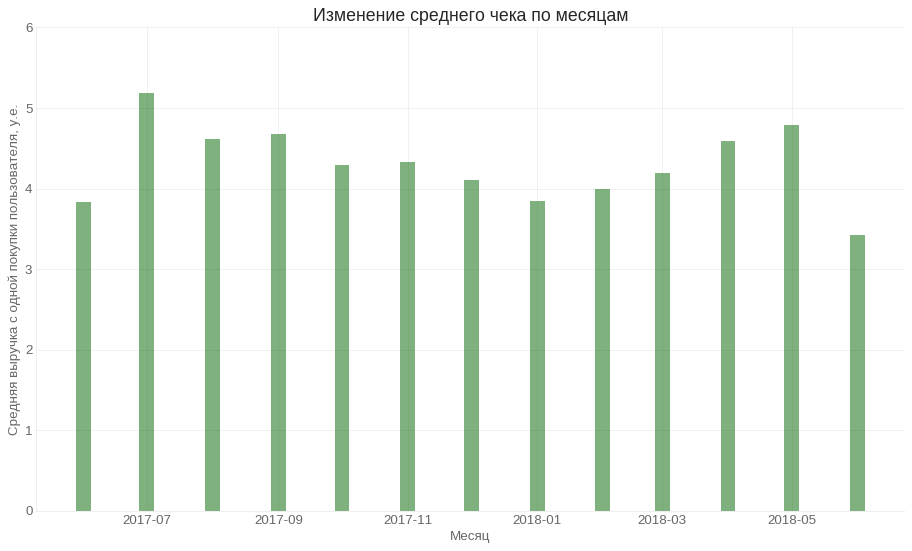

In [21]:
#Добавим месяц месяц покупки 
avg_check_data = orders
avg_check_data['order_month'] = orders['buy_ts'].astype('datetime64[M]')
#Сгруппируем выручку по месяцам покупки и пользователям 
avg_check_data_grouped = avg_check_data.groupby(['order_month', 'uid']).agg({'buy_ts' : 'nunique', 'revenue' : 'sum'}).reset_index()
avg_check_data_grouped.columns = ['order_month', 'uid', 'checks', 'total_revenue']
#Определим средний чек для каждого пользователя по месяцам
avg_check_data_grouped['avg_check'] = avg_check_data_grouped['total_revenue'] / avg_check_data_grouped['checks'] 
#Определим средний чек на пользователя в течение месяца
avg_check_grouped = avg_check_data_grouped.groupby('order_month').agg({'avg_check': 'mean'}).reset_index()
avg_check_grouped.head(10)
#Построим графики изменения среднего чека во времени
plt.figure(figsize=(14,8), dpi= 80)
plt.bar('order_month', 'avg_check', data=avg_check_grouped, color='darkgreen', width=7, alpha=.5)
#Настраиваем оформление
plt.ylim(0, 6)
plt.xticks(rotation=0, fontsize=12, alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц', alpha=.7, fontsize=12)
plt.ylabel('Средняя выручка с одной покупки пользователя, у.е.', alpha=.7, fontsize=12)
plt.title("Изменение среднего чека по месяцам", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Средний чек в течение всего времени держится в коридоре 3.5-5 у.е. Вероятно, на это мало влияет удобство сайта, как и платежеспособность клиентов. Специфика в том, что билеты покупаются на определенное количество человек, которое долго меняется для одной семьи продолжительное время. Цены на билеты больше зависят от макроэкономических факторов и сезонности.

#### <a id='section224'>2.2.4 LTV по когортам</a>

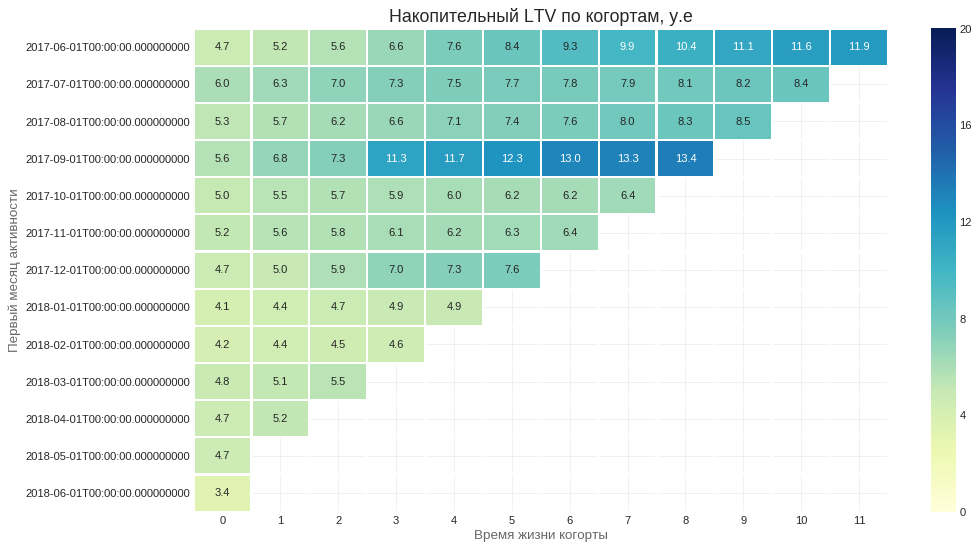

In [22]:
#Построим сводную таблицу по выручке для когортного анализа
lifetime_pivot_revenue = orders_grouped_by_month.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_user', aggfunc='sum')
#Определим накопительную среднюю выручку на пользователя за 6 месяцев
lifetime_pivot_revenue = lifetime_pivot_revenue.cumsum(axis=1)
#Выводим тепловую карту
plt.figure(figsize=(14, 8), dpi= 80)
sns.heatmap(lifetime_pivot_revenue, annot=True, fmt='.1f', linewidths=1, vmin=0, vmax=20, cmap="YlGnBu")
plt.xlabel('Время жизни когорты', alpha=.7, fontsize=12)
plt.ylabel('Первый месяц активности', alpha=.7, fontsize=12)
plt.title("Накопительный LTV по когортам, у.е", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()  

In [23]:
#Сравним средний LTV по когортам за 6 месяцев
lifetime_6m_revenue = lifetime_pivot_revenue.iloc[:7, 0:6].copy()
lifetime_6m_revenue.mean(axis=1).round(2)

first_order_month
2017-06-01    6.36
2017-07-01    6.97
2017-08-01    6.38
2017-09-01    9.15
2017-10-01    5.73
2017-11-01    5.84
2017-12-01    6.27
dtype: float64

Самый большой накопленный LTV был у когорт июня и сентября 2017 года. Это коррелирует с Retention Rate: чем больше пользователей остается в когорте, тем больше они совершают заказов и приносят прибыль. 

### <a id='section23'>2.3. Маркетинговые метрики</a>

#### <a id='section231'>2.3.1 Расходы на маркетинг по источникам</a>

In [24]:
#Определим, сколько всего было потрачено на маркетинг
print('Всего потрачено', costs['costs'].sum(), 'у.е.')

Всего потрачено 329131.6 у.е.


In [25]:
#Посмотрим, какие id источников есть
source_ids = pd.unique(costs['source_id']).tolist()
display(*source_ids)

1

2

3

4

5

9

10

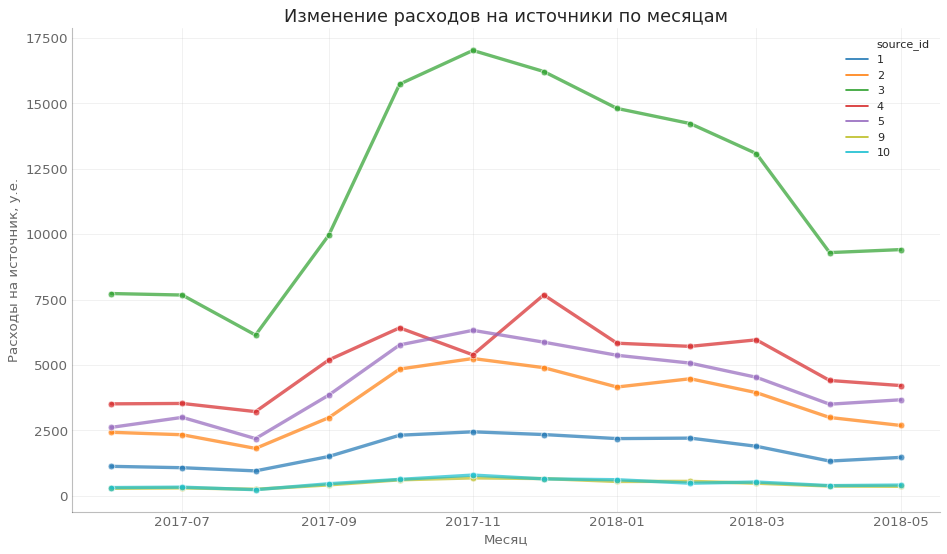

In [26]:
#Определим месяц, в который были совершены расходы
costs['month'] = costs['dt'].astype('datetime64[M]')
#Сгруппируем расходы по источникам и месяцам
costs_grouped_by_source = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
#Построим графики изменения расходов по источникам по месяцам
plt.figure(figsize=(14,8), dpi= 80)
sns.set_style('ticks')
sns.lineplot(data=costs_grouped_by_source, x='month', y='costs', hue='source_id', palette = "tab10", alpha=.7, legend='full', linewidth = 3, markers=True, marker='o')
plt.xticks(rotation=0, fontsize=12, alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц', alpha=.7, fontsize=12)
plt.ylabel('Расходы на источник, у.е.', alpha=.7, fontsize=12)
plt.title("Изменение расходов на источники по месяцам", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [33]:
#Определим суммарные расходы на каждый из источников
costs_grouped_by_source.groupby('source_id')['costs'].sum()

source_id
1      20833.269531
2      42806.039062
3     141321.625000
4      61073.601562
5      51757.101562
9       5517.489746
10      5822.490234
Name: costs, dtype: float32

Меньше всего затраты на источники 9, 10, 1. Больше всего расходов - на источник 3. Время увеличением расходов на источники соответствует времени увеличения визитов. Это означает, что посещаемость Яндекс.Афиши значительно зависит от рекламных расходов на привлечение новых пользователей.

#### <a id='section232'>2.3.2 Стоимость привлечения пользователя (CAC)</a>

In [28]:
#Определим месяц первой покупки уникальных пользователей
first_orders = orders.groupby('uid').agg({'order_month':'min'})[['order_month']].reset_index()
first_orders.rename(columns={'order_month': 'first_order_month'}, inplace=True)
#Определим время первого посещения и источник для каждого из уникальных пользователей
first_visits = visits[['device', 'uid', 'source_id', 'start_ts']].sort_values(by='start_ts').drop_duplicates(subset='uid')
first_visits['start_ts'] = first_visits['start_ts'].astype('datetime64[M]')
first_visits.columns = ['device', 'uid', 'source_id', 'first_visit_month']
#Объединим полученные таблицы в таблицу покупателей
buyers = first_orders.merge(first_visits, on='uid')
buyers = buyers.rename(columns={'uid': 'users'})
#Группируем таблицу покупателей по месяцам первой покупки и источникам
buyers_grouped = buyers.groupby(['first_order_month', 'source_id']).agg({'users':'count'}).reset_index()
#Объединяем с таблицей расходов
buyers_and_costs = pd.merge(buyers_grouped, costs_grouped_by_source, left_on=['first_order_month', 'source_id'], right_on=['month', 'source_id'])
#Посчитаем CAC
buyers_and_costs['cac'] = buyers_and_costs['costs'] / buyers_and_costs['users']
#Сгруппируем таблицу по источникам
buyers_and_costs_grouped = buyers_and_costs.groupby('source_id')
#Посчитаем среднюю CAC для каждого источника
display(buyers_and_costs_grouped['cac'].mean().round(2))

source_id
1      7.21
2     12.50
3     13.80
4      6.44
5      7.45
9      5.41
10     4.87
Name: cac, dtype: float64

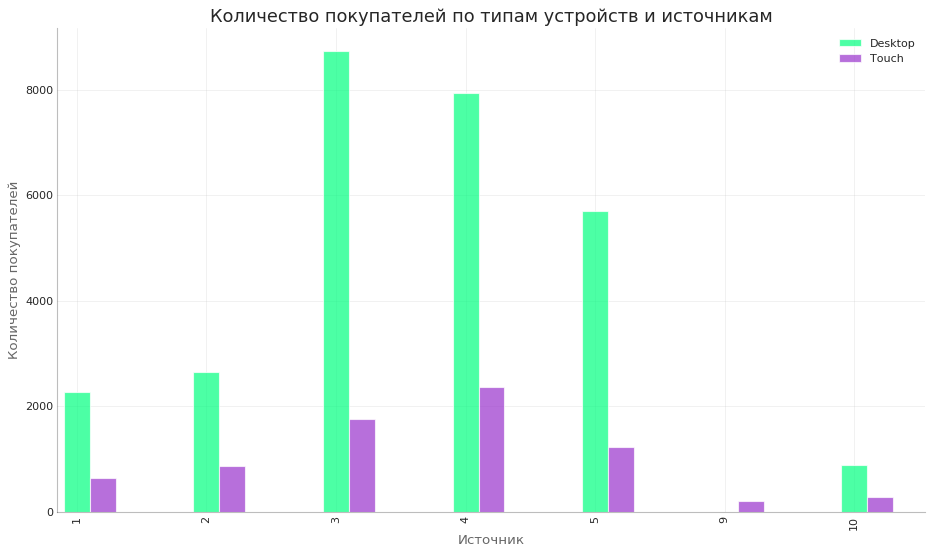

In [29]:
#Определим какие устройства используют покупатели и с какого источника они приходят
buyers_grouped_by_device = buyers.groupby(['first_order_month', 'source_id', 'device']).agg({'users':'count'}).reset_index()
#Построим график
sns.set_style('ticks')
fig = plt.figure(figsize=(14,8), dpi= 80)
ax = fig.add_subplot()
buyers_grouped_by_device_and_source_id = buyers_grouped_by_device.groupby(['source_id', 'device']).agg({'users':'sum'}).reset_index()
buyers_grouped_by_device_and_source_id[buyers_grouped_by_device_and_source_id['device'] == 'desktop'].plot.bar('source_id', 'users', width=0.2, position=0.5, color="springgreen", ax=ax, alpha=0.7)
buyers_grouped_by_device_and_source_id[buyers_grouped_by_device_and_source_id['device'] == 'touch'].plot.bar('source_id', 'users', width=0.2, position=-0.5, color="darkorchid", ax=ax, alpha=0.7)
plt.xlabel('Источник', alpha=.7, fontsize=12)
plt.ylabel('Количество покупателей', alpha=.7, fontsize=12)
plt.title("Количество покупателей по типам устройств и источникам", fontsize=16)
plt.legend(('Desktop', 'Touch'))
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Больше всего покупателей пришло с 3, 4, 5 источника. Для источника 9 не было ни одного покупателя с устройством Desktop.

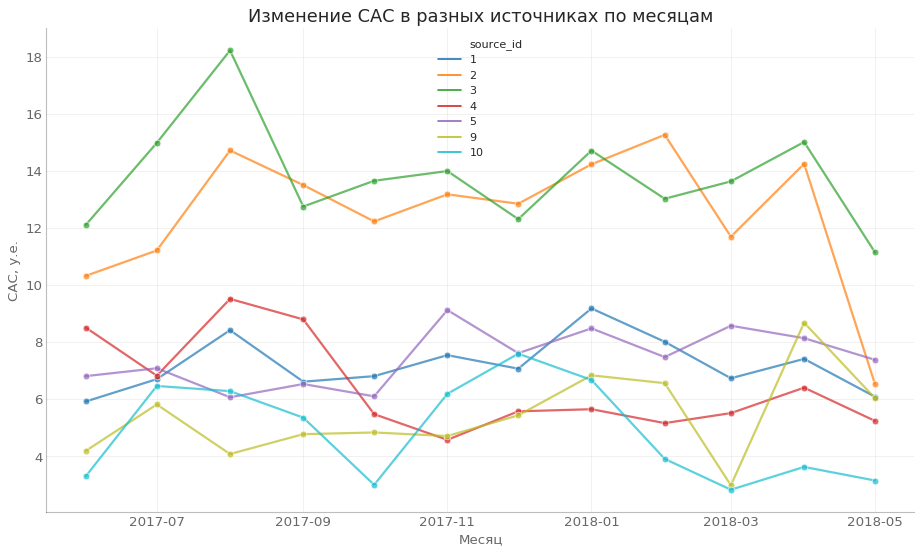

In [30]:
#Нарисуем график изменения CAC для каждого из источников по времени
plt.figure(figsize=(14,8), dpi= 80)
sns.set_style('ticks')
sns.lineplot(data=buyers_and_costs, x='month', y='cac', hue='source_id', palette = "tab10", alpha=.7, legend='full', linewidth = 2, markers=True, marker='o')
plt.xticks(rotation=0, fontsize=12, alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Месяц', alpha=.7, fontsize=12)
plt.ylabel('CAC, у.е.', alpha=.7, fontsize=12)
plt.title("Изменение CAC в разных источниках по месяцам", fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Дороже всего привлечь новых клиентов через источники 2, 3. После июля 2017 года наблюдается увеличение CAC, что свидетельствует о более рискованной рекламной стратегии с большим количеством экспериментов. В мае 2018 года CAC снижается, поскольку вместе с падением расходов на источники маркетологи оставили наиболее эффективные способы привлечения новых клиентов из источников.

#### <a id='section233'>2.3.3 ROMI по когортам в разных источниках</a>

ИСТОЧНИК: 1
В среднем CAC составляет: 7.21 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 12.01 у.е.
ROMI за данный период для источника составляет: 66.55 %


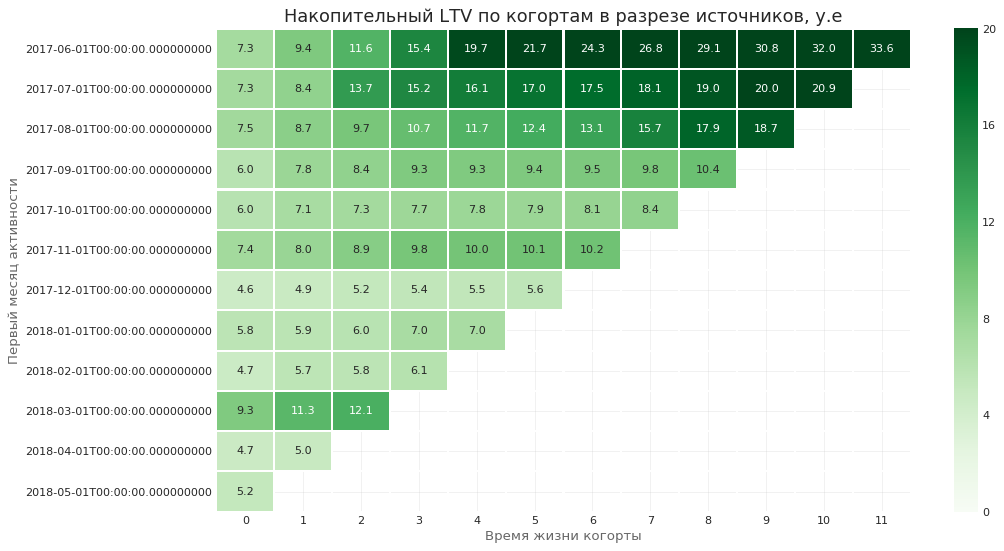

ИСТОЧНИК: 2
В среднем CAC составляет: 12.5 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 15.49 у.е.
ROMI за данный период для источника составляет: 23.89 %


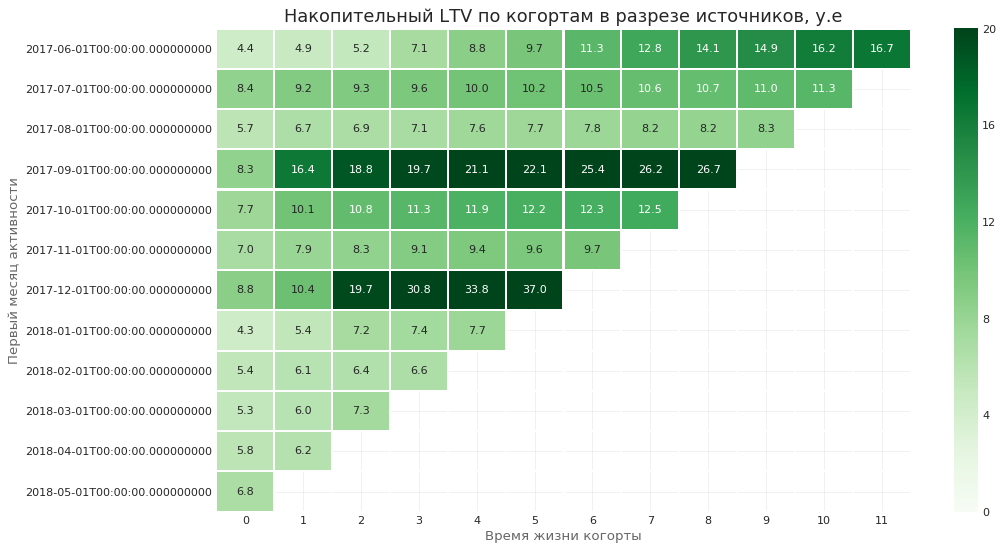

ИСТОЧНИК: 3
В среднем CAC составляет: 13.8 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 5.73 у.е.
ROMI за данный период для источника составляет: -58.49 %


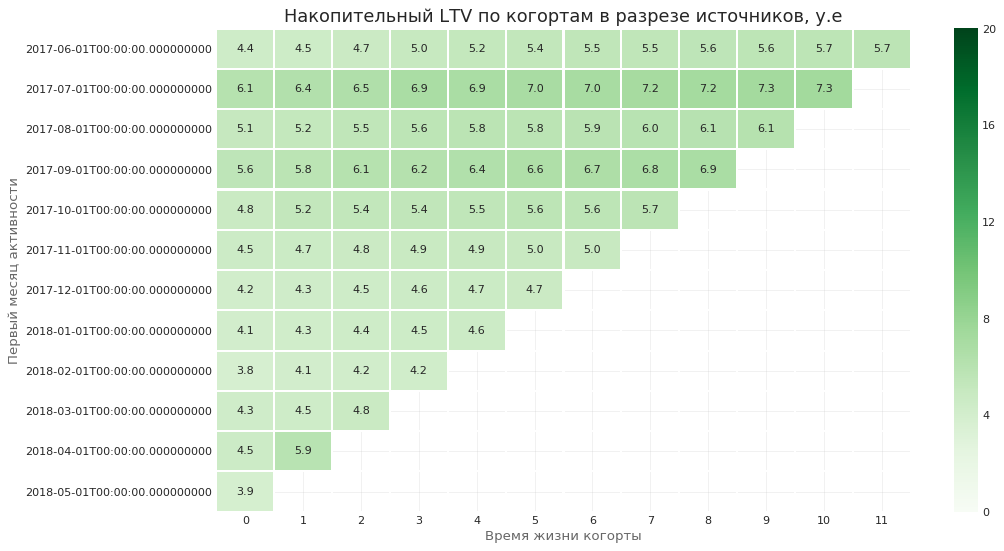

ИСТОЧНИК: 4
В среднем CAC составляет: 6.44 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 6.03 у.е.
ROMI за данный период для источника составляет: -6.32 %


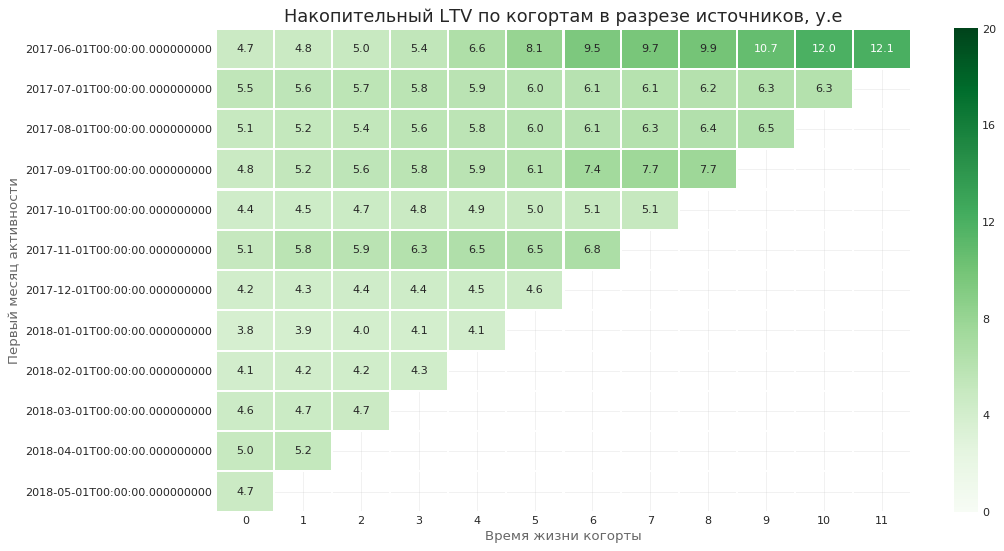

ИСТОЧНИК: 5
В среднем CAC составляет: 7.45 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 9.35 у.е.
ROMI за данный период для источника составляет: 25.41 %


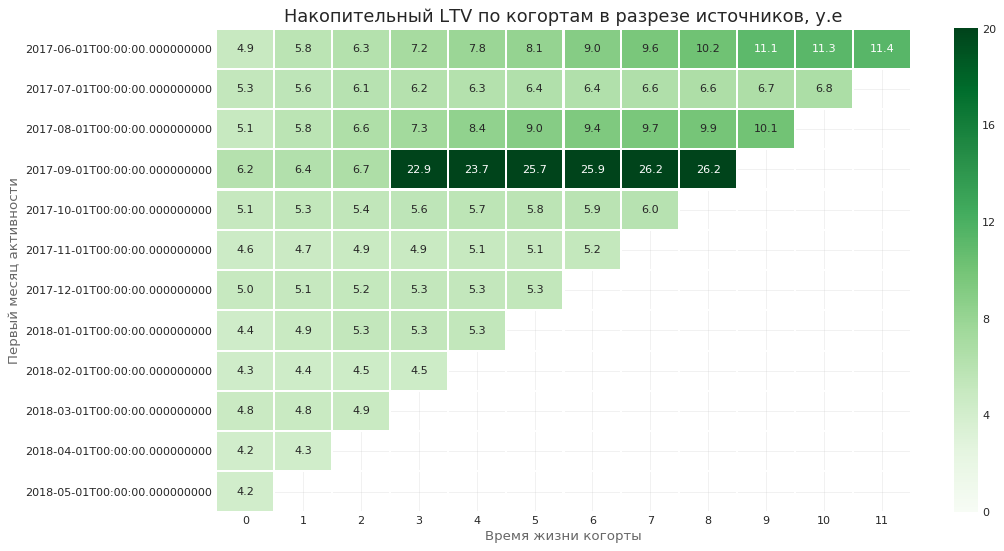

ИСТОЧНИК: 9
В среднем CAC составляет: 5.41 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 5.82 у.е.
ROMI за данный период для источника составляет: 7.41 %


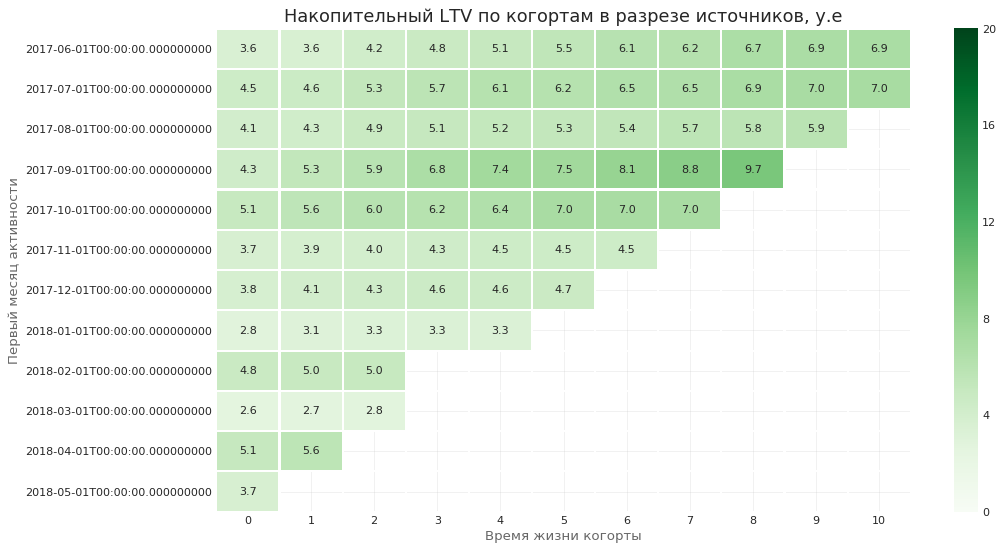

ИСТОЧНИК: 10
В среднем CAC составляет: 4.87 у.е.
В среднем пользователи за период 6 месяцев приносят REVENUE: 3.93 у.е.
ROMI за данный период для источника составляет: -19.25 %


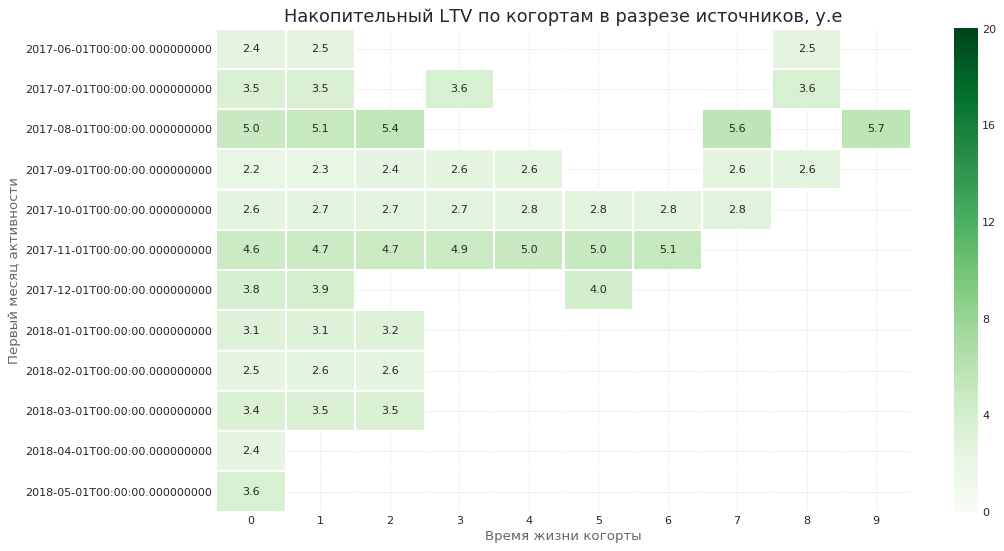

In [31]:
#Создадим датафрейм для определения ROMI по когортам в разрезе источников
romi_data = orders_enhanced[['uid', 'revenue', 'first_order_month', 'order_month']]
#Объединим с данными об источниках и месяцем первого визита
romi_data = romi_data.merge(first_visits, on='uid')
#Группируем по источника, первому месяцу покупки и месяцу
romi_data_grouped_by_month = romi_data.groupby(['source_id', 'first_order_month', 'order_month']).agg({'uid' : 'nunique', 'revenue': 'sum'}).reset_index()
#Посчитаем время жизни месячных когорт
romi_data_grouped_by_month['cohort_lifetime'] = ((romi_data_grouped_by_month['order_month'] - romi_data_grouped_by_month['first_order_month'])/np.timedelta64(1, 'M')).round().astype('int')
#Посчитаем, сколько пользователей находится в каждой из когорт на старте и добавим эти данные в таблицу
initial_users_count_by_source_ids = romi_data_grouped_by_month[romi_data_grouped_by_month['cohort_lifetime'] == 0][['first_order_month', 'uid', 'source_id']]
initial_users_count_by_source_ids = initial_users_count_by_source_ids.rename(columns = {'uid': 'cohort_users'})
romi_data_grouped_by_month = romi_data_grouped_by_month.merge(initial_users_count_by_source_ids, on=['first_order_month', 'source_id'])
#Посчитаем, сколько покупок в среднем делали пользователи и сколько в среднем приносили выручки
romi_data_grouped_by_month['revenue_per_user'] = romi_data_grouped_by_month['revenue'] / romi_data_grouped_by_month['cohort_users']
#Добавим данные по расходам
romi_data_grouped_by_month = romi_data_grouped_by_month.merge(buyers_and_costs[['first_order_month', 'source_id', 'cac']], on=['first_order_month', 'source_id'])
#Найдем ROMI для каждого из источников и построим тепловую карту для каждого источника. Формула для расчета: ROMI = ((REVENUE - CAC) / CAC) * 100%
for source_id in source_ids:
    sub_romi_data = romi_data_grouped_by_month[romi_data_grouped_by_month['source_id'] == source_id]
    lifetime_pivot_romi = sub_romi_data.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_user', aggfunc='sum')
    lifetime_pivot_romi_cac = sub_romi_data.pivot_table(index='first_order_month', values='cac', aggfunc='mean').reset_index()
    lifetime_pivot_romi_sum = lifetime_pivot_romi.cumsum(axis=1)
    print('ИСТОЧНИК:', source_id)
    print('В среднем CAC составляет:', (lifetime_pivot_romi_cac['cac'].mean()).round(2), 'у.е.')
    print('В среднем пользователи за период 6 месяцев приносят REVENUE:', (lifetime_pivot_romi_sum[5].mean()).round(2), 'у.е.')
    print('ROMI за данный период для источника составляет:', (((lifetime_pivot_romi_sum[5].mean() - lifetime_pivot_romi_cac['cac'].mean())/lifetime_pivot_romi_cac['cac'].mean())* 100).round(2), '%')
    plt.figure(figsize=(14, 8), dpi= 80)
    sns.heatmap(lifetime_pivot_romi_sum, annot=True, fmt='.1f', linewidths=1, vmin=0, vmax=20, cmap="Greens")
    plt.xlabel('Время жизни когорты', alpha=.7, fontsize=12)
    plt.ylabel('Первый месяц активности', alpha=.7, fontsize=12)
    plt.title("Накопительный LTV по когортам в разрезе источников, у.е", fontsize=16)
    plt.grid(axis='both', alpha=.3)
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()  

В течение 6 месяцев жизни когорты пользователей полностью окупаются источники 1, 2, 5, 9. Отрицательную окупаемость за этот же период имеют источники 3, 4, 10. Наиболее выгодным является источник 1 с ROMI 67% за данный период. Также выгодно привлекать клиентов через источник 2 (24%), источник 5(25%).

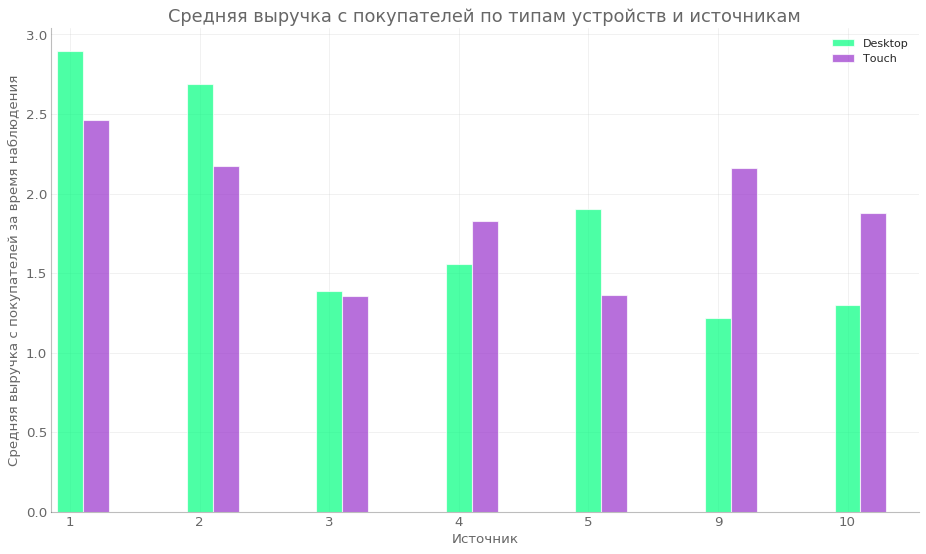

In [32]:
#Посчитаем сколько выручки приносит пользователи в разрезе устройств и источников
revenue_data = romi_data.groupby(['source_id', 'device', 'first_order_month', 'order_month']).agg({'uid' : 'nunique', 'revenue': 'sum'}).reset_index()
revenue_data['cohort_lifetime'] = ((revenue_data['order_month'] - revenue_data['first_order_month'])/np.timedelta64(1, 'M')).round().astype('int')
initial_users_count_by_source_ids_and_device = revenue_data[revenue_data['cohort_lifetime'] == 0][['first_order_month', 'uid', 'source_id', 'device']]
initial_users_count_by_source_ids_and_device = initial_users_count_by_source_ids_and_device.rename(columns = {'uid': 'cohort_users'})
revenue_data = revenue_data.merge(initial_users_count_by_source_ids_and_device, on=['first_order_month', 'source_id', 'device'])
revenue_data['revenue_per_user'] = revenue_data['revenue'] / revenue_data['cohort_users']
#Выясним сколько в среднем приносят пользователи разных устройств с разных источников по месяцам
revenue_by_source_and_device_and_order_month = revenue_data.groupby(['source_id', 'device', 'order_month']).agg({'revenue_per_user':'mean'}).reset_index()
#Выясним сколько в среднем приносят пользователи разных устройств
revenue_by_source_and_device = revenue_by_source_and_device_and_order_month.groupby(['source_id', 'device']).agg({'revenue_per_user':'mean'}).reset_index()
#Построим график
#Построим график
fig = plt.figure(figsize=(14,8), dpi= 80)
ax = fig.add_subplot()
revenue_by_source_and_device[revenue_by_source_and_device['device'] == 'desktop'].plot.bar('source_id', 'revenue_per_user', width=0.2, position=0.5, color="springgreen", ax=ax, alpha=0.7)
revenue_by_source_and_device[revenue_by_source_and_device['device'] == 'touch'].plot.bar('source_id', 'revenue_per_user', width=0.2, position=-0.5, color="darkorchid", ax=ax, alpha=0.7)
plt.xticks(rotation=0, fontsize=12, alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel('Источник', alpha=.7, fontsize=12)
plt.ylabel('Средняя выручка с покупателей за время наблюдения', alpha=.7, fontsize=12)
plt.title("Средняя выручка с покупателей по типам устройств и источникам", fontsize=16, alpha=.7)
plt.legend(('Desktop', 'Touch'))
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Больше всего выручки покупатели устройств Desktop приносят с 1, 2, 5 источника. А устройств touch с 1, 2, 9 источника. В 4, 9, 10 источнике покупатели с устройствами touch приносят в среднем больше покупатели с устройствами Desktop.

## <a id='section3'>3. Выводы и рекомендации</a>

### <a id='section31'>3.1. Определение приоритетных источников трафика и типов устройств</a>

#### Вывод
Стоимость привлечения клиентов различается в зависимости от источников и типа устройств. Причем, в то время как один источник хорошо работает для пользователей на Desktop, другие источники лучше использовать для пользователей на устройствах Touch. Некоторые источники стоит вообще исключить из-за отрицательной доходности. По мере увеличения вложений в источник растет CAC, поскольку ядро целевой аудитории расширяется до более обширной группы потенциальных, но менее замотивированных пользователей.

#### Рекомендации
Источник 1 - увеличить вложения на привлечение Desktop пользователей. Источник 2 - Увеличить вложения на привлечение Desktop пользователей. Источник 3 - оптимизировать расходы, равномерно привлекать Desktop и Touch пользователей. Источник 4 - оптимизировать расходы на привлечение за счет перераспределения вложений из Desktop рекламы в Touch. Источник 5 - увеличить вложения на привлечение Desktop пользователей. Источник 9 - увеличить вложения, особенно на Touch пользователей. Источник 10 - оптимизировать расходы на привлечение за счет перераспределения вложений из Desktop рекламы в Touch. 

### <a id='section32'>3.2. Выводы о метриках: маркетинговых, продуктовых, метриках электронной коммерции</a>

#### Вывод
#### 1. Продуктовые метрики
Больше вкладывать в рекламу необходимо в холодные месяцы года, в будние дни - поскольку пользователи в данное время более активны, чем в другое и конкуренция за пользователей на рекламных аукционах меньше (при соответствующем увеличении ставок). Необходимо избежать аномальных падений сервиса, поскольку это означает потраченные впустую деньги на рекламу. Аномальные пики активности могут быть связаны с информационными поводами, вложения в рекламу в такие дни необходимо увеличивать. Увеличение количества ежедневных посещений на пользователя вероятно не увеличит выручку существенно. Более важно увеличить среднюю продолжительность сессии за счет качества предлагаемого контента и улучшения ясности рекламных сообщений - чтобы пользователь наиболее полно понимал, что ждет его после клика по рекламе.
#### 2. Метрики электронной коммерции
Маловероятно, что средний чек на пользователя или количество покупок за 6 месяцев на пользователя можно существенно увеличить. Поскольку это больше зависит от сезонности мероприятий и других макроэкономических факторов. В то время как время до первой покупки - величина, на которую можно повлиять за счет предоставления в топе для пользователей более релевантного персонального контента и упрощения/ускорения пользовательского пути до покупки. 
#### 3. Маркетинговые метрики
Расходы на источники увеличивались в холодное время года. По итогам экспериментов, весной 2018 года стоимость привлечения клиентов уменьшилась в 2.5 раза. Дороже всего привлекать клиентов из 2 и 3 источников, но по итогам 6 месяцев жизни когорты они окупаются лучше, чем в некоторых источниках, в которых клиенты дешевле. Такие метрики как CAC и ROMI необходимо более тщательно исследовать в разрезе источников/устройств/времени года и оптимизировать структуру вложений.



### <a id='section33'>3.3. Итоги когортного анализа</a>

#### Вывод
Когорты пользователей, который сделали первый заказ в теплые месяцы более рентабельны за 6 месяцев жизни, чем другие. Желательно разделять имеющиеся когорты по устройствам/мероприятиям/источникам/полу/возрасту, поскольку только привязка ко времени совершения первой покупки является недостаточной для принятия решений о вложениях в рекламу.

### <a id='section34'>3.4. Метрики в разрезе устройств</a>

#### Вывод
Больше всего активных пользователей и покупателей пользуются устройствами типа Desktop. Покупатели с устройствами Touch - перспективный сегмент, их доля увеличилась через год наблюдений(это может быть связано как с глобальными тенденциями покупательского поведения, так и эффективностью рекламных экспериментов). Средняя выручка для разных типов устройств и разным источникам различается.